In [1]:
import pandas as pd
import numpy as np
from sklearn import gaussian_process
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel


In [3]:
df = pd.read_csv("shampoo.csv")


<Axes: >

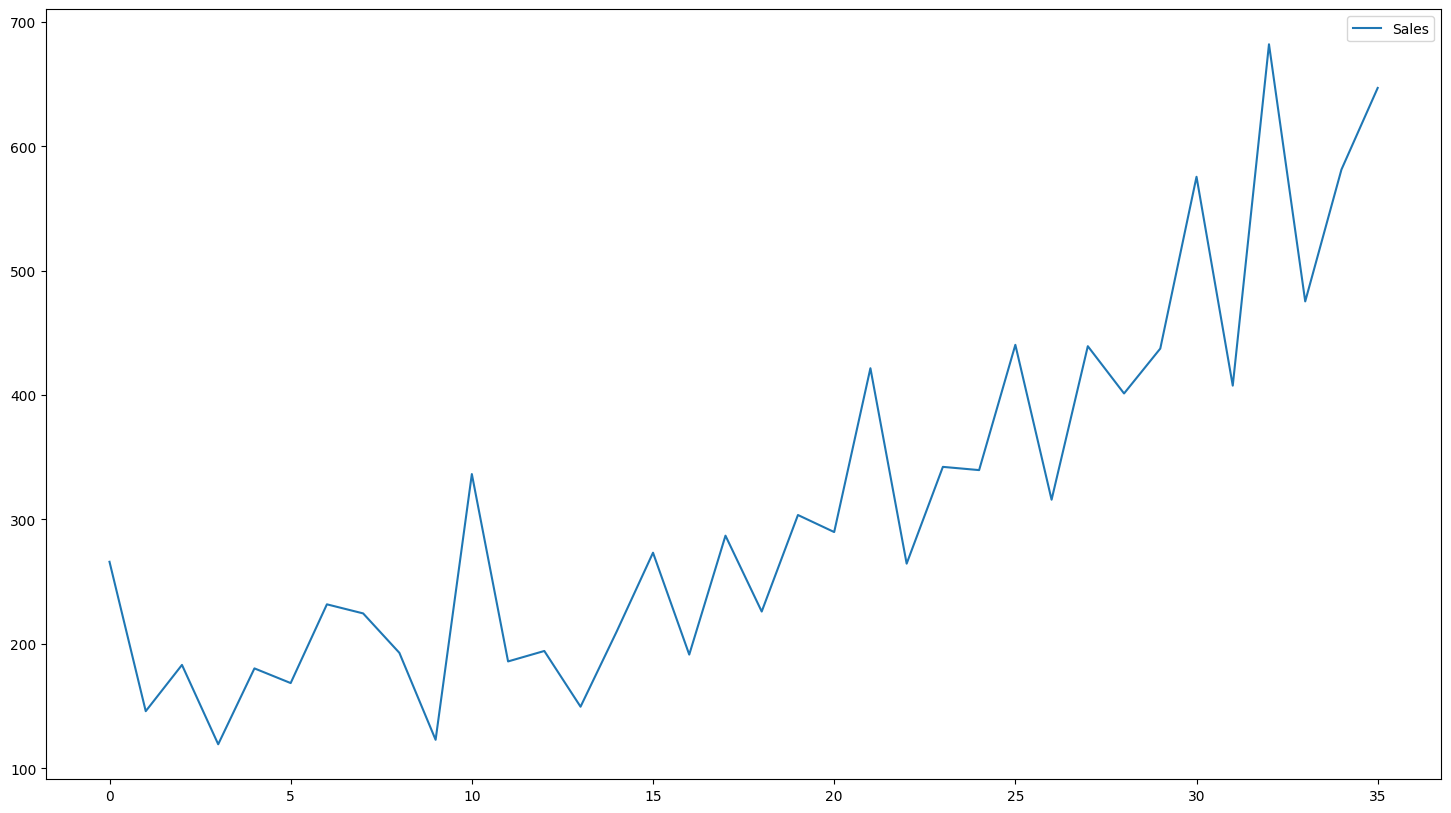

In [4]:
df.plot(figsize=(18, 10))


In [5]:
df.columns


Index(['Month', 'Sales'], dtype='object')

In [6]:
y = df["Sales"].values


In [7]:
x = np.arange(0, len(y))


In [8]:
x


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [9]:
x = x.reshape(-1, 1)
x.shape


(36, 1)

<Axes: >

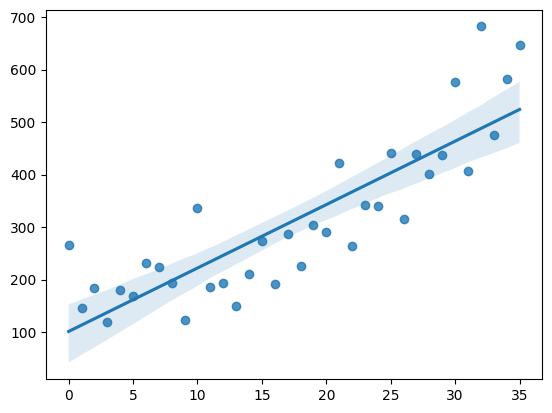

In [10]:
sns.regplot(x=x, y=y, data=df)


In [11]:
# kernel = ConstantKernel() + Matern(length_scale=1, nu=1/2) + WhiteKernel(noise_level=1e-4)
kernel = Matern(length_scale=1, nu=1 / 2)


In [12]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)


In [13]:
gp.fit(x, y)


GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=0.5))

In [14]:
gp.kernel_


Matern(length_scale=3.08, nu=0.5)

In [15]:
x_pred = np.linspace(0, 35).reshape(-1, 1)
y_pred, sigma = gp.predict(x_pred, return_std=True)


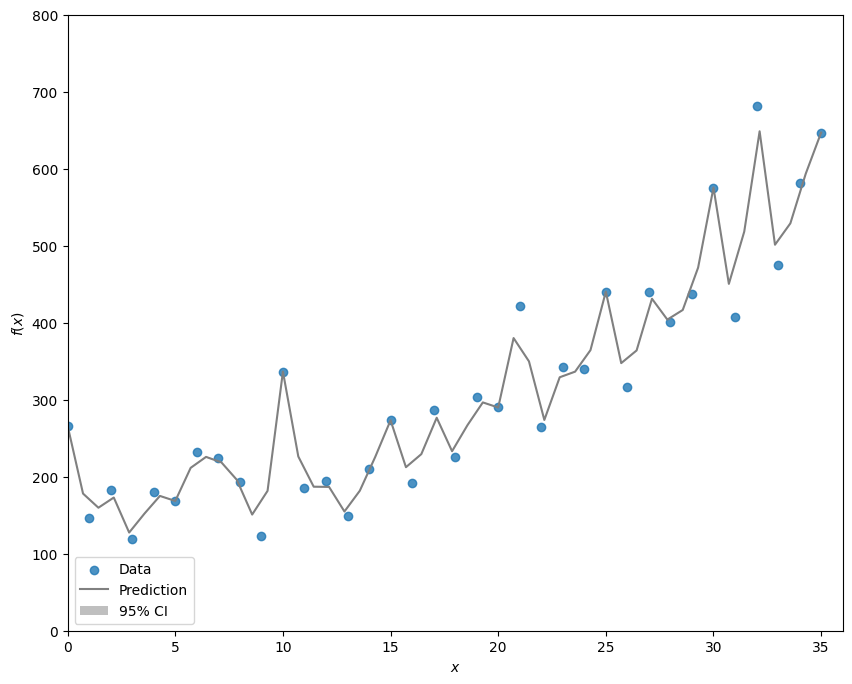

In [16]:
plt.figure(figsize=(10, 8))
sns.regplot(x=x, y=y, data=df, fit_reg=False, label="Data")
plt.plot(x_pred, y_pred, color="grey", label="Prediction")
plt.fill(
    np.concatenate([x_pred, x_pred[::-1]]),
    np.concatenate([y_pred - 2 * sigma, (y_pred + 2 * sigma)[::-1]]),
    alpha=0.5,
    fc="grey",
    ec="None",
    label="95% CI",
)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.xlim(0, 36)
plt.ylim(0, 800)
plt.legend(loc="lower left")
